# Demo on Evaluation Metrics for Regression and Classification Modeling

- [Part I. Regression Metrics](#reg)
- [Part II. Classification Metrics](#cls)

---

<a id='reg'></a>
## Part I. Regression Metrics

There are three common metrics on regression models, i.e.,  
- **Mean of Absolute Errors**
- **Mean of Squared Errors**
- **R_2 Score**

sklearn has all of them:

`from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error`

<a id='reg_content'></a>
For the demonstration purpose, I will use the built-in `Boston Housing dataset` in sklearn. Follow the **8 STEPS** below.

- [STEP 1: Import the related packages and dataset.](#reg_step1)
- [STEP 2: Import regression modeling packages and evaluation metrics packages from sklearn.](#reg_step2)
- [STEP 3: Instantiate the regressors](#reg_step3)
- [STEP 4: Fit the instantiated models on the training data.](#reg_step4)
- [STEP 5: Use the fitted models to predict.](#reg_step5)
- [STEP 6: Self-define the calculation of r2, mse, mae.](#reg_step5)
- [STEP 7: Compare the results between self-defined functions and sklearn built-in methods.](#reg_step7)
- [STEP 8: Print out and compare all the results to see which model did the best.](#reg_step8)

<a id='reg_step1'></a>
**STEP 1: Read in the dataset and set up the training and testing data that will be used for the rest of this task.**

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import numpy as np

boston = load_boston()
y = boston.target
X = boston.data

X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.33, random_state=42)

In [4]:
# Get to a little bit know about the dataset.
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

[Back](#reg_content)

<a id='reg_step2'></a>
**STEP 2: Import FOUR packages for regression modeling from sklearn**

Here, we choose 
- `RandomForestRegressor` and `AdaBoostRegressor` in `ensemble` methods; 
- `LinearRegression`
- `DecisionTreeRegressor`

In [10]:
# Notice: be sure to choose the regressor version (not the classifier version)
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Import the built-in metrics for regression models in sklearn
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

[Back](#reg_content)

<a id='reg_step3'></a>
**STEP 3: Instantiate each of the four regressors and use the defaults for all the hyperparameters.**

In [6]:
tree_mod = DecisionTreeRegressor()
rf_mod = RandomForestRegressor()
ada_mod = AdaBoostRegressor()
reg_mod = LinearRegression()

<a id='reg_step4'></a>
**STEP 4: Fit the instantiated models on the training data.**

In [7]:
tree_mod.fit(X_train, y_train)
rf_mod.fit(X_train, y_train)
ada_mod.fit(X_train, y_train)
reg_mod.fit(X_train, y_train)

LinearRegression()

<a id='reg_step5'></a>
**STEP 5: Use each of the fitted models to predict on the testing data.**

In [11]:
preds_tree = tree_mod.predict(X_test) 
preds_rf = rf_mod.predict(X_test)
preds_ada = ada_mod.predict(X_test)
preds_reg = reg_mod.predict(X_test)

[Back](#reg_content)

<a id='reg_step6'></a>
**STEP 6: Self-define these THREE metrics to understand how they will be calculated in sklearn under the hood.**

In [ ]:
# r2 score definition
def r2(actual, preds):
    '''
    INPUT:
    actual - numpy array or pd series of actual y values
    preds - numpy array or pd series of predicted y values
    OUTPUT:
    returns the r-squared score as a float
    '''
    sse = np.sum((actual-preds)**2)
    sst = np.sum((actual-np.mean(actual))**2)
    return 1 - sse/sst

# Check solution matches sklearn
print(r2(y_test, preds_tree))
print(r2_score(y_test, preds_tree))

In [12]:
# mse (mean squared errors) definition
def mse(actual, preds):
    '''
    INPUT:
    actual - numpy array or pd series of actual y values
    preds - numpy array or pd series of predicted y values
    OUTPUT:
    returns the mean squared error as a float
    '''
    
    return np.mean((actual - preds)**2)

In [13]:
# mae (mean absolute errors) definition
def mae(actual, preds):
    '''
    INPUT:
    actual - numpy array or pd series of actual y values
    preds - numpy array or pd series of predicted y values
    OUTPUT:
    returns the mean absolute error as a float
    '''
    
    return np.mean(np.abs((actual - preds)))

[Back](#reg_content)

<a id='reg_step7'></a>
**STEP 7: Check the results above with the built-in results from sklearn. Take Decision Tree model for an example.**

In [15]:
data = {'Built-in':[r2_score(y_test, preds_tree), mean_squared_error(y_test, preds_tree), mean_absolute_error(y_test, preds_tree)], \
       'Self-defined': [r2(y_test, preds_tree), mse(y_test, preds_tree), mae(y_test, preds_tree)]}
results = pd.DataFrame(data, index=['r2 score', 'mean squared error', 'mean absolute error'])
results

,Built-in,Self-defined
r2 score,0.749784,0.749784
mean squared error,18.935988,18.935988
mean absolute error,2.956287,2.956287


[Back](#reg_content)

<a id='reg_step8'></a>
**STEP 8: Use the built-in methods to print out all the results to see which model did the best.**

In [16]:
def print_metrics(y_true, preds, model_name=None):
    '''
    INPUT:
    y_true - the y values that are actually true in the dataset (numpy array or pandas series)
    preds - the predictions for those values from some model (numpy array or pandas series)
    model_name - (str - optional) a name associated with the model if you would like to add it to the print statements 
    
    OUTPUT:
    None - prints the mse, mae, r2
    '''
    if model_name == None:
        print('Mean Squared Error: ', format(mean_squared_error(y_true, preds)))
        print('Mean Absolute Error: ', format(mean_absolute_error(y_true, preds)))
        print('R2 Score: ', format(r2_score(y_true, preds)))
        print('\n\n')
    
    else:
        print('Mean Squared Error ' + model_name + ' :' , format(mean_squared_error(y_true, preds)))
        print('Mean Absolute Error ' + model_name + ' :', format(mean_absolute_error(y_true, preds)))
        print('R2 Score ' + model_name + ' :', format(r2_score(y_true, preds)))
        print('\n\n')

In [17]:
# Print Decision Tree scores
print_metrics(y_test, preds_tree, 'tree')

# Print Random Forest scores
print_metrics(y_test, preds_rf, 'random forest')

# Print AdaBoost scores
print_metrics(y_test, preds_ada, 'adaboost')

# Linear Regression scores
print_metrics(y_test, preds_reg, 'linear reg')

Mean Squared Error tree : 18.9359880239521
Mean Absolute Error tree : 2.9562874251497004
R2 Score tree : 0.749783810077857



Mean Squared Error random forest : 10.21522224550898
Mean Absolute Error random forest : 2.168616766467066
R2 Score random forest : 0.8650181872608877



Mean Squared Error adaboost : 15.74723290871108
Mean Absolute Error adaboost : 2.772526116068805
R2 Score adaboost : 0.7919193540231275



Mean Squared Error linear reg : 20.72402343733974
Mean Absolute Error linear reg : 3.1482557548168217
R2 Score linear reg : 0.7261570836552478





<font size=4>As we can see from above, the <font color='green'>**random forest**</font> model was the best in terms of all the metrics in this case. (i.e. the smallest of `mse` and `mae`, and largest `r2 score`.)</font>

[Back](#reg_content)

---

<a id='cls'></a>
## Part II. Classification Metrics

This part will dig into a number of techniques used to understand how well the **classification model** is performing. Namely use four metrics:  
- **accuracy_score**
- **precision_score**
- **recall_score**
- **f1_score**

The dataset for demo is the `spam` dataset.

<a id='cls_content'></a>

Follow the 7 STEPS below.  

- [STEP 1: Import packages and instantiate models.](#cls_step1)
- [STEP 2: Fit these models and predict.](#cls_step2)
- [STEP 3: Self-define the four metrics for evaluating the classification models](#cls_step3)
- [STEP 4: Check the results above with the built-in results from sklearn](#cls_step4)
- [STEP 5: Print out all the results to see which model did the best in which metric.](#cls_step5)
- [STEP 6: f beta score](#cls_step6)
- [STEP 7: Building ROC curves and calculate the AUC.](#cls_step7)

<a id='cls_step1'></a>
**STEP 1: Import packages and prepare the data, and then instantiate a number of different models.**

In [18]:
import os
os.chdir('projects_on_GitHub/Machine_learning/Evaluation_Metrics')

In [19]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC

%matplotlib inline
# Read in our dataset
df = pd.read_table('smsspamcollection/SMSSpamCollection',
                   sep='\t', 
                   header=None, 
                   names=['label', 'sms_message'])

# Fix our response value
df['label'] = df.label.map({'ham':0, 'spam':1})

# Split our dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(df['sms_message'], 
                                                    df['label'], 
                                                    random_state=1)

# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

# Instantiate a number of our models
naive_bayes = MultinomialNB()
bag_mod = BaggingClassifier(n_estimators=200)
rf_mod = RandomForestClassifier(n_estimators=200)
ada_mod = AdaBoostClassifier(n_estimators=300, learning_rate=0.2)
svm_mod = SVC()

[Back](#cls_content)

<a id='cls_step2'></a>
**STEP 2: Fit these models on the training dataset and predict on the testing dataset.**

In [20]:
# Fit each of the 4 models
# This might take some time to run
naive_bayes.fit(training_data, y_train)
bag_mod.fit(training_data, y_train)
rf_mod.fit(training_data, y_train)
ada_mod.fit(training_data, y_train)
svm_mod.fit(training_data, y_train)

# Make predictions using each of these models
preds_nb = naive_bayes.predict(testing_data)
preds_bag = bag_mod.predict(testing_data)
preds_rf = rf_mod.predict(testing_data)
preds_ada = ada_mod.predict(testing_data)
preds_svm = svm_mod.predict(testing_data)

[Back](#cls_content)

<a id='cls_step3'></a>
To better understand how each metric was calculated under tbe hood of `sklearn`, the following cells will self-define some functions for calculating these metrics with a single model (e.g. naive bayes model), and at the end of this part we are able to choose models that are best based on a particular metric.

**STEP 3: Self-define the four metrics for classification models, i.e., `accuracy score`, `precision score`, `recall score`, and `f1 score`.**

In [22]:
# accuracy is the total correct divided by the total to predict
def accuracy(actual, preds):
    '''
    INPUT
    preds - predictions as a numpy array or pandas series
    actual - actual values as a numpy array or pandas series
    
    OUTPUT:
    returns the accuracy as a float
    '''
    return np.sum(preds == actual)/len(actual)


In [23]:
# precision is the true positives over the predicted positive values
def precision(actual, preds):
    '''
    INPUT
    (assumes positive = 1 and negative = 0)
    preds - predictions as a numpy array or pandas series 
    actual - actual values as a numpy array or pandas series
    
    OUTPUT:
    returns the precision as a float
    '''
    tp = len(np.intersect1d(np.where(actual==1), np.where(preds==1)))
    preds_pos = np.sum(preds==1)
    return tp/preds_pos

In [24]:
# recall is true positives over all actual positive values
def recall(actual, preds):
    '''
    INPUT
    preds - predictions as a numpy array or pandas series
    actual - actual values as a numpy array or pandas series
    
    OUTPUT:
    returns the recall as a float
    '''
    tp = len(np.intersect1d(np.where(actual==1), np.where(preds==1)))
    actual_pos = np.sum(actual==1)
    return tp/actual_pos

In [25]:
# f1_score is 2*(precision*recall)/(precision+recall))
def f1(preds, actual):
    '''
    INPUT
    preds - predictions as a numpy array or pandas series
    actual - actual values as a numpy array or pandas series
    
    OUTPUT:
    returns the f1score as a float
    '''
    tp = len(np.intersect1d(np.where(preds==1), np.where(actual==1)))
    
    pred_pos = (preds==1).sum()
    prec = tp/(pred_pos)
    
    act_pos = (actual==1).sum()
    recall = tp/act_pos
    
    return 2*(prec*recall)/(prec+recall)

[Back](#cls_content)

<a id='cls_step4'></a>
Based on the metrcis calculation functions defined above, we will take the naive bayes model for comparison with sklearn built-in calculation results.

**STEP 4: Check the results above with the built-in results from sklearn. Take Decision Tree model for an example.**

In [26]:
data = {'Built-in':[accuracy_score(y_test, preds_nb), precision_score(y_test, preds_nb), recall_score(y_test, preds_nb), f1_score(y_test, preds_nb)], \
       'Self-defined': [accuracy(y_test, preds_nb), precision(y_test, preds_nb), recall(y_test, preds_nb), f1(y_test, preds_nb)]}
results = pd.DataFrame(data, index=['accuracy', 'precision', 'recall', 'f1'])
results

,Built-in,Self-defined
accuracy,0.988514,0.988514
precision,0.972067,0.972067
recall,0.940541,0.940541
f1,0.956044,0.956044


***NOTES:***  
- **accuracy**, when have imbalanced classes, we definitely not want to use.
- **recall**, when want to make sure the positive cases are all caught even if that means we might identify some negatives as positives.
- **precision**, When identify something as positive, we want to be sure it is truly positive. 
- **f1**, when care equally about identifying positive and negative cases.

[Back](#cls_content)

<a id='cls_step5'></a>
**STEP 5: Use the built-in methods to print out all the results to see which model did the best.**

In [27]:
def print_metrics(y_true, preds, model_name=None):
    '''
    INPUT:
    y_true - the y values that are actually true in the dataset (numpy array or pandas series)
    preds - the predictions for those values from some model (numpy array or pandas series)
    model_name - (str - optional) a name associated with the model if you would like to add it to the print statements 
    
    OUTPUT:
    None - prints the accuracy, precision, recall, and F1 score
    '''
    if model_name == None:
        print('Accuracy score: ', format(accuracy_score(y_true, preds)))
        print('Precision score: ', format(precision_score(y_true, preds)))
        print('Recall score: ', format(recall_score(y_true, preds)))
        print('F1 score: ', format(f1_score(y_true, preds)))
        print('\n\n')
    
    else:
        print('Accuracy score for ' + model_name + ' :' , format(accuracy_score(y_true, preds)))
        print('Precision score ' + model_name + ' :', format(precision_score(y_true, preds)))
        print('Recall score ' + model_name + ' :', format(recall_score(y_true, preds)))
        print('F1 score ' + model_name + ' :', format(f1_score(y_true, preds)))
        print('\n\n')

In [28]:
# Print Bagging scores
print_metrics(y_test, preds_bag, 'bagging')

# Print Random Forest scores
print_metrics(y_test, preds_rf, 'random forest')

# Print AdaBoost scores
print_metrics(y_test, preds_ada, 'adaboost')

# Naive Bayes Classifier scores
print_metrics(y_test, preds_nb, 'naive bayes')

# SVM Classifier scores
print_metrics(y_test, preds_svm, 'svm')

Accuracy score for bagging : 0.9755922469490309
Precision score bagging : 0.9217877094972067
Recall score bagging : 0.8918918918918919
F1 score bagging : 0.9065934065934066



Accuracy score for random forest : 0.9820531227566404
Precision score random forest : 1.0
Recall score random forest : 0.8648648648648649
F1 score random forest : 0.927536231884058



Accuracy score for adaboost : 0.9770279971284996
Precision score adaboost : 0.9693251533742331
Recall score adaboost : 0.8540540540540541
F1 score adaboost : 0.9080459770114943



Accuracy score for naive bayes : 0.9885139985642498
Precision score naive bayes : 0.9720670391061452
Recall score naive bayes : 0.9405405405405406
F1 score naive bayes : 0.9560439560439562



Accuracy score for svm : 0.9849246231155779
Precision score svm : 0.9939759036144579
Recall score svm : 0.8918918918918919
F1 score svm : 0.9401709401709402





As a final step in this workbook, we'll take a look at the last three metrics, `f-beta scores`, `ROC curves`, and `AUC`.

**For f-beta scores:** If you decide that you care more about precision, you should move beta closer to 0.  If you decide you care more about recall, you should move beta towards infinity. 

[Back](#cls_content)

<a id='cls_step6'></a>
**Step 6:** Using the fbeta_score works similar to most of the other metrics in sklearn, but you also need to set beta as your weighting between precision and recall.  We can use the [fbeta in sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.fbeta_score.html) to replicate the f1-score from above. To use a different weighting, [this article](http://mlwiki.org/index.php/Precision_and_Recall) does an amazing job of explaining how we might adjust beta for different situations.

In [31]:
# import fbeta_score
from sklearn.metrics import fbeta_score

# Produce the same f1_score results using fbeta_score
print(fbeta_score(y_test, preds_bag, beta=1))
print(f1_score(y_test, preds_bag))

0.9065934065934066
0.9065934065934066


[Back](#cls_content)

<a id='cls_step7'></a>
**STEP 7: Building ROC curves and calculate the AUC.**

In [32]:
# Function for calculating auc and roc

def build_roc_auc(model, X_train, X_test, y_train, y_test):
    '''
    INPUT:
    model - an sklearn instantiated model
    X_train - the training data
    y_train - the training response values (must be categorical)
    X_test - the test data
    y_test - the test response values (must be categorical)
    OUTPUT:
    auc - returns auc as a float
    prints the roc curve
    '''
    import numpy as np
    import matplotlib.pyplot as plt
    from itertools import cycle
    from sklearn.metrics import roc_curve, auc, roc_auc_score
    from scipy import interp
    
    y_preds = model.fit(X_train, y_train).predict_proba(X_test)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(y_test)):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_preds[:, 1])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_preds[:, 1].ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.plot(fpr[2], tpr[2], color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc[2])
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.show()
    
    return roc_auc_score(y_test, np.round(y_preds[:, 1]))
    

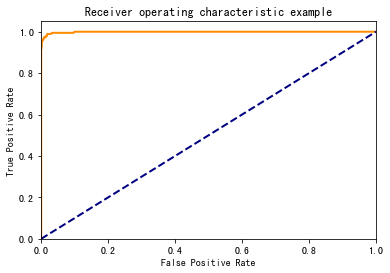

0.9297297297297298

In [33]:
# Finding roc and auc for the random forest model    
build_roc_auc(rf_mod, training_data, testing_data, y_train, y_test) 

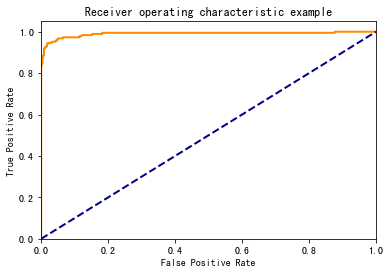

0.9249574906031861

In [34]:
# Finding roc and auc for the AdaBoost model 
build_roc_auc(ada_mod, training_data, testing_data, y_train, y_test) 

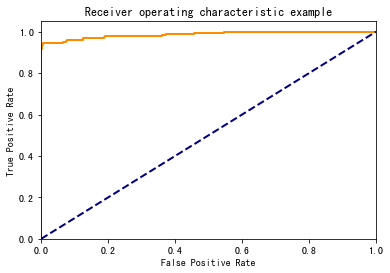

0.9682007338464294

In [35]:
# Finding roc and auc for the naive bayes model 
build_roc_auc(naive_bayes, training_data, testing_data, y_train, y_test) 

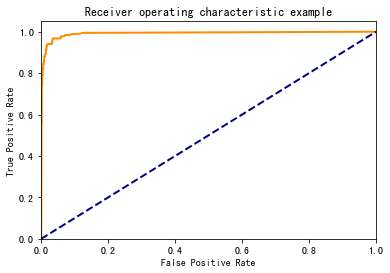

0.9389095221048863

In [36]:
# Finding roc and auc for the bagging model 
build_roc_auc(bag_mod, training_data, testing_data, y_train, y_test) 

[Back](#cls_content)